In [140]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import yfinance as yf
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np


# Step 1 - Data Capture

## Historical Data using 'Close' Price Top 10 Crypto

In [141]:
# Top 10 Crypto Coin Yahoo Finance Tickers
tickers = ['BTC-USD','ETH-USD','BNB-USD','XRP-USD','SOL-USD','LUNA-USD','ADA-USD','AVAX-USD','DOT-USD','DOGE-USD']

In [297]:
# Historical Data for top 10 crypto coins 2016 - 2019
# IGNORE ERROR THIS IS BC THE CRYPTOS DIDNT EXIST AT THAT TIME
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2018, 12, 31)
 
hist_2016_2019 = pdr.get_data_yahoo(tickers, start, end)
hist_1_close = hist_2016_2019['Close'].hvplot(
    title = "2016 - 2019 Historical Close Price",
    ylabel = "Closing Price",
    height = 600,
    width = 1200
)
hist_1_close          

/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SOL-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AVAX-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOT-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [296]:
# Historical Data for top 10 crypto coins 2016 - Present
#start = dt.datetime(2016, 1, 1)
#end = dt.datetime(2022, 5, 2)
 
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 2)
 
hist_2016_present = pdr.get_data_yahoo(tickers, start, end)
hist_1_close = hist_2016_present['Close'].hvplot(
    title = "2016 - Present Historical Close Price",
    ylabel = "Closing Price",
    height = 600,
    width = 1200)
hist_1_close 

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [295]:
# Historical Data for top 10 crypto coins 2020 - Present
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 5, 2)
 
hist_2020_present = pdr.get_data_yahoo(tickers, start, end)
hist_3_close = hist_2020_present['Close'].dropna().hvplot(
    title = "2020 - Present Historical Close Price", 
    ylabel = "Closing Price",
    height = 600,
    width = 1200
)
hist_3_close

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

## Market Cap For Top 10 Crypto

In [151]:
# Get market cap for top 10 crypto coins 
# How do we visulaize using a pie chart?
mc_data = pdr.get_quote_yahoo(tickers)
mc = mc_data['marketCap']
mc


BTC-USD     745038807040
ETH-USD     344465178624
BNB-USD      64167391232
XRP-USD      29885396992
SOL-USD      29223065600
LUNA-USD            7348
ADA-USD      28111474688
AVAX-USD     16521591808
DOT-USD      15072963584
DOGE-USD     17406763008
Name: marketCap, dtype: int64

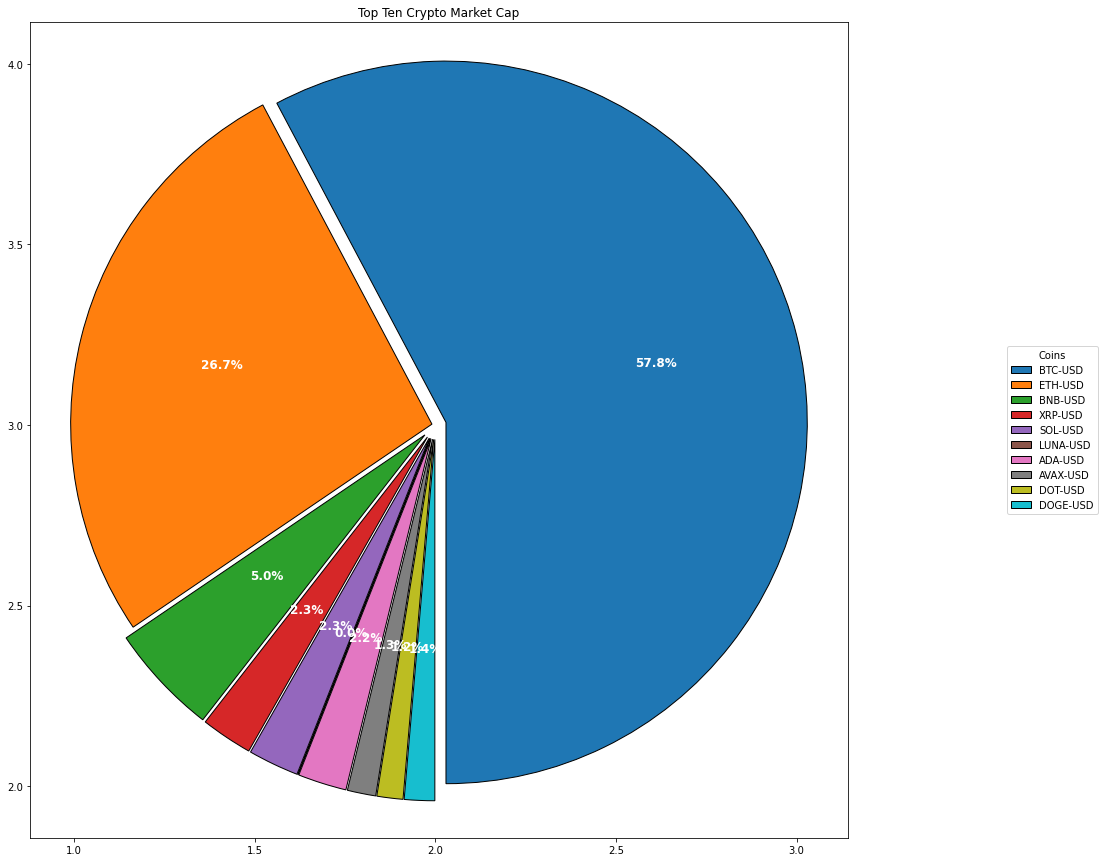

In [137]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"} # Width = 1

data = mc
tick = tickers

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts , autotexts = ax.pie(
    data, autopct=lambda pct: func(pct, data),
    textprops=dict(color="w"),
    explode = [0.03,0.01,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04],
    #shadow = True,
    pctdistance = 0.6, 
    labeldistance = 1.6, 
    startangle = 270,
    radius = 1, 
    counterclock = True, 
    wedgeprops = wedgeprops,
    center=(2, 3),
    frame=True,
    #rotatelabels=True 
    )

ax.legend(wedges, tick,
          title="Coins",
          loc="center",
          bbox_to_anchor=(1, 0, 0.5, 1),
          
          )

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top Ten Crypto Market Cap")

plt.show()

# STEP 2 - ANALYZING CRYPTOS TOGETHER TO COMPARE RETURNS, VOLATILITY, AND RISK/RETURN PROFILE:


## Historical Daily Returns using pct_change():

In [240]:
x = pdr.get_data_yahoo(tickers)
daily_returns = x['Close'].pct_change()
daily_returns.tail()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2022-04-30,-0.023179,-0.030336,-0.038911,-0.039770,-0.094833,-0.104468,-0.060100,-0.100432,-0.101644,-0.055322
2022-05-01,0.019998,0.035737,0.033127,0.035349,0.053770,0.020005,0.044517,0.031695,0.059352,0.040892
2022-05-02,0.001566,0.010487,-0.001566,0.010570,-0.023313,0.001418,-0.011153,0.028221,-0.026219,-0.013821
2022-05-03,-0.020215,-0.025875,-0.015898,-0.015335,-0.019852,-0.020057,-0.013287,-0.014161,-0.016785,-0.010830
2022-05-04,0.032286,0.023550,0.027166,0.022437,0.019741,0.032105,0.082742,0.046598,0.035852,0.012577


In [241]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2018, 12, 31)
 
x = pdr.get_data_yahoo(tickers, start, end)
daily_returns_2016_2019 = x['Close'].pct_change()
daily_returns_2016_2019.tail()

/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SOL-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AVAX-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/scottjmarler/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOT-USD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,LUNA-USD,ADA-USD,DOGE-USD,SOL-USD,AVAX-USD,DOT-USD
Date,,,,,,,,,,
2018-12-28,0.073624,0.180750,0.139586,0.104613,-0.055592,0.133120,0.029611,NaN,NaN,NaN
2018-12-29,-0.026379,0.002698,-0.029856,-0.025474,-0.034338,-0.008456,-0.012736,NaN,NaN,NaN
2018-12-30,0.011921,0.013340,0.028011,0.006342,-0.016691,0.042691,-0.014981,NaN,NaN,NaN
2018-12-31,-0.031881,-0.046412,0.028190,-0.045660,-0.249447,-0.051225,-0.008872,NaN,NaN,NaN
2019-01-01,0.026938,0.055869,-0.014511,0.034207,0.288102,0.036140,0.019608,NaN,NaN,NaN


In [242]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2022, 5, 2)
 
x = pdr.get_data_yahoo(tickers, start, end)
daily_returns_2016_present = x['Close'].dropna().pct_change()
daily_returns_2016_present.tail()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2022-04-29,-0.029266,-0.041315,-0.033576,-0.051145,-0.042515,-0.029332,-0.046101,-0.057968,-0.049053,-0.017006
2022-04-30,-0.023179,-0.030336,-0.038911,-0.039770,-0.094833,-0.104468,-0.060100,-0.100432,-0.101644,-0.055322
2022-05-01,0.019998,0.035737,0.033127,0.035349,0.053770,0.020005,0.044517,0.031695,0.059352,0.040892
2022-05-02,0.001566,0.010487,-0.001566,0.010570,-0.023313,0.001418,-0.011153,0.028221,-0.026219,-0.013821
2022-05-03,-0.020215,-0.025875,-0.015898,-0.015335,-0.019852,-0.020057,-0.013287,-0.014161,-0.016785,-0.010830


In [244]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 5, 2)
 
x = pdr.get_data_yahoo(tickers, start, end)
daily_returns_2020_present = x['Close'].dropna().pct_change()
daily_returns_2020_present.head()

Symbols,BTC-USD,ETH-USD,BNB-USD,XRP-USD,SOL-USD,LUNA-USD,ADA-USD,AVAX-USD,DOT-USD,DOGE-USD
Date,,,,,,,,,,
2020-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-23,-0.027734,-0.067886,-0.051607,-0.052250,-0.027015,-0.021165,-0.061049,-0.213227,-0.034267,-0.036145
2020-09-24,0.050153,0.087941,0.076863,0.052816,0.104330,0.050134,0.078866,0.108801,0.086957,0.026563
2020-09-25,-0.006259,0.008094,0.002014,0.038715,0.017843,-0.006378,0.169385,0.031910,0.008896,0.026636
2020-09-26,0.005425,0.009384,0.063162,0.000984,-0.016907,0.005502,-0.013227,-0.036719,-0.016578,0.006672


### Average Daily Returns Top 10 Crypto and Standard Deviations Using describe(). Sorted by Most Volatile

In [279]:
avg_daily_returns = daily_returns.describe().T.sort_values(by=['std'],ascending=False)
avg_daily_returns

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
LUNA-USD,1637.0,0.052251,0.535027,-0.901786,-0.055021,-0.001710,0.046965,9.696629
DOGE-USD,1637.0,0.006684,0.116990,-0.402570,-0.024139,-0.000787,0.020360,3.555466
SOL-USD,754.0,0.009370,0.082865,-0.372088,-0.037703,0.001721,0.049972,0.472828
AVAX-USD,660.0,0.006836,0.079723,-0.364950,-0.035810,0.000000,0.038062,0.750013
ADA-USD,1637.0,0.004560,0.077701,-0.395672,-0.030334,0.000460,0.030825,1.366810
DOT-USD,622.0,0.005233,0.072952,-0.379335,-0.030215,0.000000,0.031968,0.559877
XRP-USD,1637.0,0.002865,0.069404,-0.423340,-0.023362,-0.000977,0.021858,0.834708
BNB-USD,1637.0,0.005125,0.063095,-0.419046,-0.023081,0.001187,0.029967,0.697604
ETH-USD,1637.0,0.002655,0.050934,-0.423472,-0.021322,0.001567,0.027972,0.264581


In [298]:
# We can change to a box plot but need help with visuals 
plot_avg_daily_returns = avg_daily_returns['std'].hvplot.bar(
    title = "Volatility Between Top 10 Crypto",
    height = 600,
    width = 1200
)
plot_avg_daily_returns

:Bars   [Symbols]   (std)

In [294]:
cumulative_crypto_returns = (1 + daily_returns).cumprod()
cumulative_crypto_returns.hvplot( 
    title="Cumulative Crypto Returns",
    width = 1200,
    height = 600
)

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)